<div class="alert alert-info">
ДИПЛОМНАЯ РАБОТА
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

data_file = 'HR.csv'

<div class="alert alert-info">
1. Загрузите файл HR.csv в pandas dataframe
</div>

In [3]:
df = pd.read_csv(data_file)
print(df.head(10))

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0   

<div class="alert alert-info">
2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
</div>

In [4]:
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

<div class="alert alert-info">
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.
</div>

In [5]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<div class="alert alert-info">
Наиболее скорреклированными параметрами являются average_montly_hours и number_project. Коэффициент корреляции равен 0.417211. 
То есть корреляция явно указывает на взаимосвязь среднего количества часов на рабочем месте в месяц и числа проектов, 
выполненных за время работы.
Еще одна пара наиболее скорреллированных параметров является satisfaction_level и left. Коэффициент корреляции равен -0.388375. 
При этом нужно обратить внимание что корреляция является обратной, о чем говорит знак у значения коэффициента корреляции. 
Это вполне обяснимо, признак уволившегося сотрудника обратно пропорционален уровню удовлетворенности работой. 

Тем не менее невысокие значения коэффициента корреляции говорит о том, что либо параметры слабо зависимы друг от друга, либо между ними есть нелинейная зависимость. 
    
Наименее скоррелированными являются пары Work_accident и time_spend_company (0.002120), а также promotion_last_5years и average_montly_hours (-0.003544).
</div>

<div class="alert alert-info">
4. Рассчитайте сколько сотрудников работает в каждом департаменте.
</div>

In [6]:
d = df[['department', 'satisfaction_level']].groupby('department').count()
print(d)

             satisfaction_level
department                     
IT                         1227
RandD                       787
accounting                  767
hr                          739
management                  630
marketing                   858
product_mng                 902
sales                      4140
support                    2229
technical                  2720


<div class="alert alert-info">
5. Показать распределение сотрудников по зарплатам.
</div>

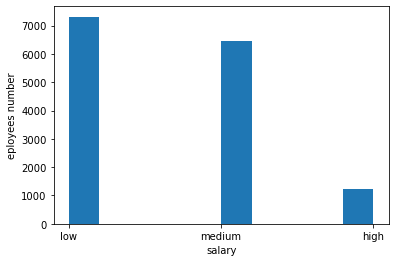

In [7]:
plt.hist(df['salary'])
plt.xlabel('salary')
plt.ylabel('eployees number')
plt.show()

<div class="alert alert-info">
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
</div>

In [8]:
df[['department', 'salary', 'satisfaction_level']].groupby(['department', 'salary']).count()

satisfaction_level
department  salary                    
IT          high                    83
            low                    609
            medium                 535
RandD       high                    51
            low                    364
            medium                 372
accounting  high                    74
            low                    358
            medium                 335
hr          high                    45
            low                    335
            medium                 359
management  high                   225
            low                    180
            medium                 225
marketing   high                    80
            low                    402
            medium                 376
product_mng high                    68
            low                    451
            medium                 383
sales       high                   269
            low                   2099
            medium                1772
support     high                   141
            low                   1146
            medium                 942
technical   high                   201
            low                   1372
            medium                1147

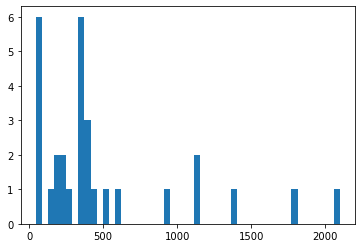

In [9]:
plt.hist(df[['department', 'salary', 'satisfaction_level']].groupby(['department', 'salary']).count(), histtype='barstacked', bins=50)
plt.show()

<div class="alert alert-info">
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
</div>

<div class="alert alert-info">
Выдвинем две гипотезы:
    H0 - Сотрудники с высоким окладом проводят на работе столько же времени, что и сотрудники с низким окладом.
    HA - Сотрудники с высоким окладом проводят на работе больше или меньше времени, чем сотрудники с низким окладом.
Примем значение уровня значимости $\alpha$ равным 0.05
</div>

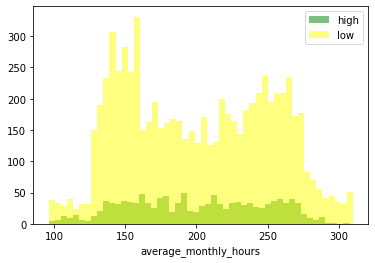

In [10]:
amh_hs = pd.Series(dtype='int64')
amh_ls = pd.Series(dtype='int64')
amh_hs = df[['average_montly_hours', 'salary']].query('salary == \'high\'')['average_montly_hours']
amh_ls = df[['average_montly_hours', 'salary']].query('salary == \'low\'')['average_montly_hours']

# print(amh_hs.mean())
# print(amh_ls.mean())
plt.hist(amh_hs, alpha=0.5, color='green', bins=50)
plt.hist(amh_ls, alpha=0.5, color='yellow', bins=50)
plt.xlabel('average_monthly_hours')
plt.legend(['high', 'low'])
plt.show()

In [11]:
alpha = 0.05 # уровень значимости
statistic, p_value = stats.ttest_ind(amh_hs, amh_ls, equal_var=False) 
if p_value > alpha:
    print(f'p_value ({p_value}) > alpha ({alpha}). Не отвергаем гипотезу H0.')
else:
    print(f'p_value ({p_value}) < alpha ({alpha}). Отвергаем гипотезу H0.')

p_value (0.4459045542257889) > alpha (0.05). Не отвергаем гипотезу H0.


<div class="alert alert-info">
То есть, мы не можем подтвердить гипотезу о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
</div>

<div class="alert alert-info">
8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
    ● Доля сотрудников с повышением за последние 5 лет
    ● Средняя степень удовлетворенности
    ● Среднее количество проектов
</div>

In [14]:
emp_left = df[['promotion_last_5years', 'left']].query('left == 1 and promotion_last_5years == 1').count() / len(df) * 100 
satisfied_avg_left = df[['satisfaction_level', 'left']].query('left == 1').mean()
left_prj_mean_count = df[['number_project', 'left']].query('left == 1').mean()

emp_wrk = df[['promotion_last_5years', 'left']].query('left == 0 and promotion_last_5years == 1').count() / len(df) * 100 
satisfied_avg_wrk = df[['satisfaction_level', 'left']].query('left == 0').mean()
wrk_prj_mean_count = df[['number_project', 'left']].query('left == 0').mean()

print(f'Доля уволившихся сотрудников c повышением за последние 5 лет к общему числу сотрудников: {emp_left.promotion_last_5years} %')
print(f'Средний уровень удовлетворенных среди уволившихся содрудников: {satisfied_avg_left.satisfaction_level}')
print(f'Среднее количество проектов среди уволившихся сотрудников: {left_prj_mean_count.number_project}')
print(f'Доля работающих сотрудников c повышением за последние 5 лет к общему числу сотрудников: {emp_wrk.promotion_last_5years} %')
print(f'Средний уровень удовлетворенных среди работающих содрудников: {satisfied_avg_wrk.satisfaction_level}')
print(f'Среднее количество проектов среди работающих сотрудников: {wrk_prj_mean_count.number_project}')

Доля уволившихся сотрудников c повышением за последние 5 лет к общему числу сотрудников: 0.1266751116741116 %
Средний уровень удовлетворенных среди уволившихся содрудников: 0.44009801176140917
Среднее количество проектов среди уволившихся сотрудников: 3.8555026603192384
Доля работающих сотрудников c повышением за последние 5 лет к общему числу сотрудников: 2.000133342222815 %
Средний уровень удовлетворенных среди работающих содрудников: 0.666809590479516
Среднее количество проектов среди работающих сотрудников: 3.786664333216661


<div class="alert alert-info">
9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.
</div>

In [15]:
lda_model = pd.DataFrame()
lda_model = df.query('left == 1') 
plt.plotting.scatter_matrix(lda_model, alpha=0.5)
plt.show()

AttributeError: 'function' object has no attribute 'scatter_matrix'